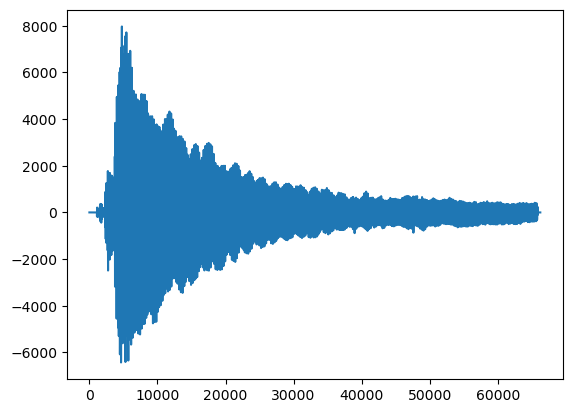

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# source of the sound file: https://pixabay.com/sound-effects/mandolin-strum-high-g-chord-100702/
sample_rate, data= wavfile.read('chord.wav')

sound = 0.5*(data[:,0]+data[:,1]) # average the left and right channels

plt.plot(sound)

[11592.5          +0.j          2030.98572355+2298.09417671j
  8508.92125214+6290.65863218j  3427.40443669+9658.91758855j
 10789.49580056+3045.81170907j  7032.65633351+3176.17217841j
  -892.67930523+1769.47653238j  5271.78241829 +269.6536439j
   942.81812386-9704.32838173j -2531.08451811+6461.88995078j]


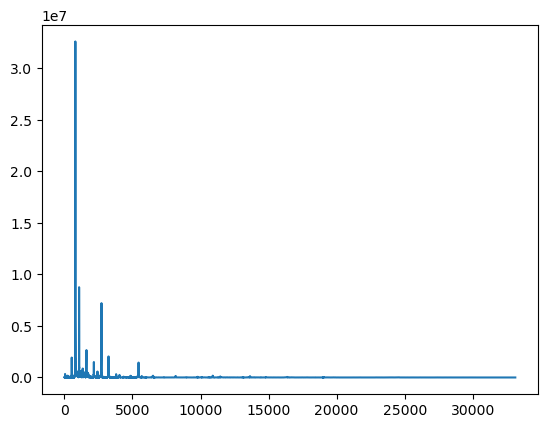

In [2]:
sound_f = np.fft.rfft(sound)
plt.plot(np.abs(sound_f))
print(sound_f[0:10])

amplitudes= np.abs(sound_f)

(0.0, 1000.0)

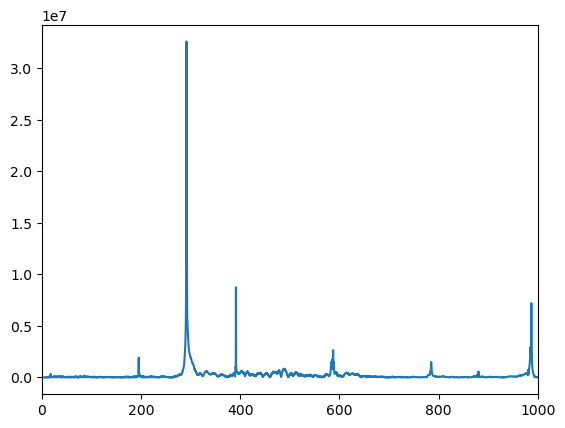

In [3]:
# plot amplitudes against actual frequencies
frequencies = np.fft.rfftfreq(len(sound), d=1/sample_rate)
plt.figure()
plt.plot(frequencies, amplitudes)
plt.xlim(0, 1000)

In [4]:
# list the 30 most prominent frequencies
for i in np.argsort(amplitudes)[:-30:-1]:
    print(frequencies[i])

291.6666666666667
291.304347826087
292.02898550724643
292.3913043478261
290.9420289855073
292.75362318840587
391.304347826087
986.9565217391306
290.57971014492756
293.11594202898556
293.47826086956525
290.21739130434787
986.5942028985509
293.840579710145
987.3188405797102
294.2028985507247
289.8550724637682
294.5652173913044
294.9275362318841
289.49275362318843
295.2898550724638
295.6521739130435
289.13043478260875
986.2318840579711
987.68115942029
296.01449275362324
985.144927536232
288.76811594202906
296.37681159420293


In [5]:
from librosa import hz_to_note, note_to_hz
for i in np.argsort(amplitudes)[:-30:-1]:
    print(hz_to_note(frequencies[i]))

D4
D4
D4
D4
D4
D4
G4
B5
D4
D4
D4
D4
B5
D4
B5
D4
D4
D4
D4
D4
D4
D4
D4
B5
B5
D4
B5
D4
D4


In [ ]:
# The chord is a G major chord, with the notes G, B and D